### Agnostic smooth minimization

**Purpose of this demo**: Motivate optimization in general (hyper-parameter selection, non-convexity)

+ Disclaimer: I'm not expert in Python - I use Python/Matlab as tools to validate algorithms and theorems. 
+ Thus, my implementations are not the most efficient ones + there might be bugs

**Problem definition: Weird 2d non-convex problem**. 

\begin{align}
  f(x_1, x_2) = (x_1 + 2x_2 - 7)^2 + (2x_1 + x_2 - 5)^2
\end{align}

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^2}{\text{min}}
& & f(x_1, x_2)
\end{aligned}
\end{equation*}

+ Any properties you might extract by just looking at the function?

+ Is it differentiable?

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_1} = 2(x_1 + 2x_2 - 7) + 4(2x_1 + x_2 - 5)
\end{align}

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_2} = 4(x_1 + 2x_2 - 7) + 2(2x_1 + x_2 - 5)
\end{align}

and as a vector:
\begin{align}
    \nabla f(x_1, x_2) = \begin{bmatrix} 2(x_1 + 2x_2 - 7) + 4(2x_1 + x_2 - 5) \\ 4(x_1 + 2x_2 - 7) + 2(2x_1 + x_2 - 5) \end{bmatrix}
\end{align}

+ Is it negative-valued, positive-valued, or both?

**3D plot** 

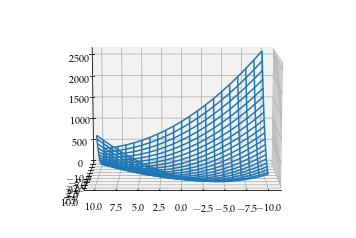

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from numpy import linalg as la

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + 2*Y - 7)**2 + (2*X + Y - 5)**2

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.view_init(10, 90)

In [2]:
# Returns the value of the objecive function
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [3]:
def GD_Booth(x_new, eta, iters, epsilon, verbose, x_star):
    p = 2
    
    x_list, f_list = [la.norm(x_new - x_star, 2)], [f(x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        grad[0] = 2*(x_old[0] + 2*x_old[1] - 7) + 4*(2*x_old[0] + x_old[1] - 5)
        grad[1] = 4*(x_old[0] + 2*x_old[1] - 7) + 2*(2*x_old[0] + x_old[1] - 5)
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_star, 2)) + ", f(x_new) = " + str(f(x_new)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

[0.49255614 1.33813875]
iter# = 0, ||x_new - x_star||_2 = 10.430723848324238, f(x_new) = 149.76
iter# = 1, ||x_new - x_star||_2 = 8.344579078659391, f(x_new) = 95.8464
iter# = 2, ||x_new - x_star||_2 = 6.675663262927513, f(x_new) = 61.341696
iter# = 3, ||x_new - x_star||_2 = 5.340530610342009, f(x_new) = 39.25868544
iter# = 4, ||x_new - x_star||_2 = 4.272424488273608, f(x_new) = 25.125558681599987
iter# = 5, ||x_new - x_star||_2 = 3.4179395906188863, f(x_new) = 16.080357556223994
iter# = 6, ||x_new - x_star||_2 = 2.734351672495109, f(x_new) = 10.29142883598336
iter# = 7, ||x_new - x_star||_2 = 2.187481337996087, f(x_new) = 6.586514455029355
iter# = 8, ||x_new - x_star||_2 = 1.7499850703968696, f(x_new) = 4.215369251218784
iter# = 9, ||x_new - x_star||_2 = 1.3999880563174956, f(x_new) = 2.6978363207800222
iter# = 10, ||x_new - x_star||_2 = 1.1199904450539964, f(x_new) = 1.7266152452992158
iter# = 11, ||x_new - x_star||_2 = 0.8959923560431972, f(x_new) = 1.105033756991499
iter# = 12, ||x

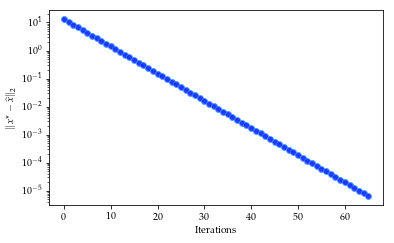

In [5]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100
eta = 0.1
x_init = np.random.randn(2)    # Initial estimate
print(x_init)
x_init[0] = -10
x_init[1] = 10
#print(x_init)
x_star = [1, 3]
        
x_GD, x_list, f_list = GD_Booth(x_init, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

**Problem definition: Weirder 2d non-convex problem**. 

\begin{align}
  f(x_1, x_2) = \sum_{i = 1}^2 \tfrac{x_i^2}{4000} - \prod_{i = 1}^2\cos\left( \tfrac{x_i}{\sqrt{i}} \right) + 1
\end{align}

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^2}{\text{min}}
& & f(x_1, x_2)
\end{aligned}
\end{equation*}

+ Any properties you might extract by just looking at the function?

+ Is it differentiable?

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_1} = \tfrac{x_1}{2000} + \sin\left(x_1\right) \cdot \cos\left(\tfrac{x_2}{\sqrt{2}}\right)
\end{align}

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_2} = \tfrac{x_2}{2000} + \cos\left(x_1\right) \cdot \frac{\sin\left(\tfrac{x_2}{\sqrt{2}}\right)}{\sqrt{2}}
\end{align}

and as a vector:
\begin{align}
    \nabla f(x_1, x_2) = \begin{bmatrix} \tfrac{x_1}{2000} + \sin\left(x_1\right) \cdot \cos\left(\tfrac{x_2}{\sqrt{2}}\right) \\ 
    \tfrac{x_2}{2000} + \cos\left(x_1\right) \cdot \frac{\sin\left(\tfrac{x_2}{\sqrt{2}}\right)}{\sqrt{2}} \end{bmatrix}
\end{align}

**3D plot** 

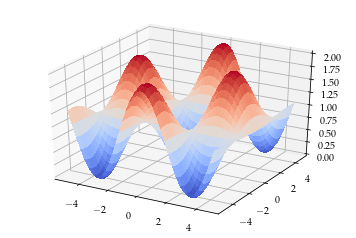

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2)/4000 + (Y**2)/4000 - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [7]:
# Returns the value of the objecive function
def f(x):
    return (x[0]**2)/4000 + (x[1]**2)/4000 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2)) + 1

In [9]:
def GD_Griewank(x_new, eta, iters, epsilon, verbose, x_star):
    p = 2
    
    x_list, f_list = [la.norm(x_new - x_star, 2)], [f(x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        grad[0] = x_old[0]/2000 + np.sin(x_old[0]) * np.cos(x_old[1]/np.sqrt(2))
        grad[1] = x_old[1]/2000 + np.cos(x_old[0]) * np.sin(x_old[1]/np.sqrt(2))/np.sqrt(2)
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_star, 2)) + ", f(x_new) = " + str(f(x_new)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

[1.16087887 0.11772141]
iter# = 0, ||x_new - x_star||_2 = 4.289994093446908, f(x_new) = 0.451111915378152
iter# = 1, ||x_new - x_star||_2 = 4.336622065544058, f(x_new) = 0.41742485538835383
iter# = 2, ||x_new - x_star||_2 = 4.382385899565041, f(x_new) = 0.38557080425973167
iter# = 3, ||x_new - x_star||_2 = 4.427164077022921, f(x_new) = 0.35556060647444554
iter# = 4, ||x_new - x_star||_2 = 4.470852561667597, f(x_new) = 0.3273866012169465
iter# = 5, ||x_new - x_star||_2 = 4.513364639108809, f(x_new) = 0.30102430813022985
iter# = 6, ||x_new - x_star||_2 = 4.554630365950368, f(x_new) = 0.27643442175438393
iter# = 7, ||x_new - x_star||_2 = 4.594595703117596, f(x_new) = 0.253564995562653
iter# = 8, ||x_new - x_star||_2 = 4.633221410216152, f(x_new) = 0.23235370132698585
iter# = 9, ||x_new - x_star||_2 = 4.6704817750393754, f(x_new) = 0.21273006291313157
iter# = 10, ||x_new - x_star||_2 = 4.706363245905188, f(x_new) = 0.1946175823068389
iter# = 11, ||x_new - x_star||_2 = 4.740863025600378, f(

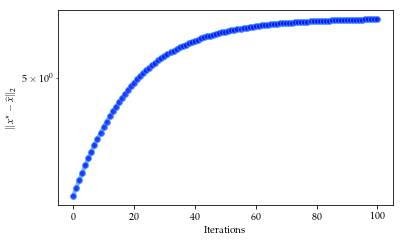

In [11]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100
eta = 0.1
x_init = np.random.randn(2)    # Initial estimate
print(x_init)
x_init[0] = -3
x_init[1] = 3
#print(x_init)
x_star = [0, 0]
        
x_GD, x_list, f_list = GD_Griewank(x_init, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Non-convex Lipschitz continuous gradient function

\begin{align}
  f(x) = x^2 + 3\sin^2(x)
\end{align}

Then, its gradient and Hessian are calculated as:
\begin{align}
f'(x) = 2x + 6\sin(x) \cdot \cos(x), ~~f''(x) = 2 + 6\cos^2(x) - 6\sin^2(x)
\end{align}


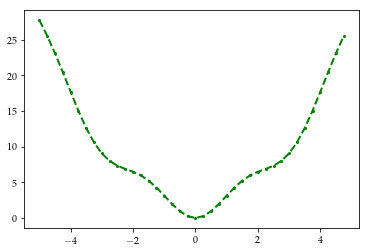

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Make data.
x = np.arange(-5, 5, 0.25)
f = x**2 + 3*(np.sin(x))**2

ax.plot(x, f, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=2)

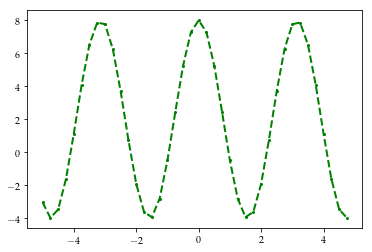

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Make data.
x = np.arange(-5, 5, 0.25)
hessian_f = 2 + 6*(np.cos(x))**2 - 6*(np.sin(x))**2

ax.plot(x, hessian_f, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=2)

Which means that we can upper bound:
\begin{align}
\|\nabla^2 f(x)\|_2 \leq 8 := L
\end{align}


### Convex optimization

+ It is not easy to find practical problems that are just smooth (with Lipschitz continuous gradients only), in order to show sublinear convergence in practice (even logistic regression, as we will see later on, has linear convergence under assumptions).

+ In the following example, we will highlight the importance of the condition number in optimization

### Well-conditioned linear regression

In [42]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 100  # Ambient dimension
n = 100  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

2.000000000000002
[0.25]


In [43]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

iter# = 0, ||x_new - x_old||_2 = 0.5891816567917135
iter# = 1, ||x_new - x_old||_2 = 0.2092867784419609
iter# = 2, ||x_new - x_old||_2 = 0.11339440657306406
iter# = 3, ||x_new - x_old||_2 = 0.06858036209484125
iter# = 4, ||x_new - x_old||_2 = 0.04403985035108074
iter# = 5, ||x_new - x_old||_2 = 0.029364076907887993
iter# = 6, ||x_new - x_old||_2 = 0.0200717622616955
iter# = 7, ||x_new - x_old||_2 = 0.013957264607919786
iter# = 8, ||x_new - x_old||_2 = 0.009825671344374782
iter# = 9, ||x_new - x_old||_2 = 0.006980940727033071
iter# = 10, ||x_new - x_old||_2 = 0.004995079482951423
iter# = 11, ||x_new - x_old||_2 = 0.0035942433016768966
iter# = 12, ||x_new - x_old||_2 = 0.002598021756561791
iter# = 13, ||x_new - x_old||_2 = 0.0018849386850889303
iter# = 14, ||x_new - x_old||_2 = 0.0013718271980184354
iter# = 15, ||x_new - x_old||_2 = 0.0010010025651305456
iter# = 16, ||x_new - x_old||_2 = 0.000732036773213431
iter# = 17, ||x_new - x_old||_2 = 0.0005363560318463738
iter# = 18, ||x_new - x_

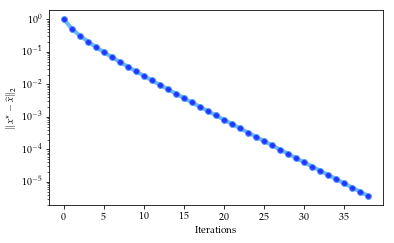

In [45]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100

x_IHT, x_list, f_list = GD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

In [48]:
# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 100, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

100.00000000000061
[1.e-04]


iter# = 0, ||x_new - x_old||_2 = 0.3779856546628649
iter# = 1, ||x_new - x_old||_2 = 0.16162290725087616
iter# = 2, ||x_new - x_old||_2 = 0.09795150291344486
iter# = 3, ||x_new - x_old||_2 = 0.06864355810170653
iter# = 4, ||x_new - x_old||_2 = 0.05164982065431553
iter# = 5, ||x_new - x_old||_2 = 0.04058751707971205
iter# = 6, ||x_new - x_old||_2 = 0.03287333791209494
iter# = 7, ||x_new - x_old||_2 = 0.02724043627430866
iter# = 8, ||x_new - x_old||_2 = 0.022990795855458743
iter# = 9, ||x_new - x_old||_2 = 0.019706017778176675
iter# = 10, ||x_new - x_old||_2 = 0.017118441086582007
iter# = 11, ||x_new - x_old||_2 = 0.0150481102885676
iter# = 12, ||x_new - x_old||_2 = 0.013369466434807294
iter# = 13, ||x_new - x_old||_2 = 0.011992445698304743
iter# = 14, ||x_new - x_old||_2 = 0.01085104927924934
iter# = 15, ||x_new - x_old||_2 = 0.009896060477747104
iter# = 16, ||x_new - x_old||_2 = 0.009090216810525908
iter# = 17, ||x_new - x_old||_2 = 0.008404917094983476
iter# = 18, ||x_new - x_old||_2 

iter# = 672, ||x_new - x_old||_2 = 5.887674435659246e-05
iter# = 673, ||x_new - x_old||_2 = 5.869040632940212e-05
iter# = 674, ||x_new - x_old||_2 = 5.850511014837682e-05
iter# = 675, ||x_new - x_old||_2 = 5.8320849888459506e-05
iter# = 676, ||x_new - x_old||_2 = 5.813761965654146e-05
iter# = 677, ||x_new - x_old||_2 = 5.795541359116101e-05
iter# = 678, ||x_new - x_old||_2 = 5.7774225862388186e-05
iter# = 679, ||x_new - x_old||_2 = 5.75940506715423e-05
iter# = 680, ||x_new - x_old||_2 = 5.741488225101616e-05
iter# = 681, ||x_new - x_old||_2 = 5.7236714864055056e-05
iter# = 682, ||x_new - x_old||_2 = 5.705954280453386e-05
iter# = 683, ||x_new - x_old||_2 = 5.688336039681589e-05
iter# = 684, ||x_new - x_old||_2 = 5.670816199549251e-05
iter# = 685, ||x_new - x_old||_2 = 5.653394198516568e-05
iter# = 686, ||x_new - x_old||_2 = 5.6360694780346e-05
iter# = 687, ||x_new - x_old||_2 = 5.618841482514197e-05
iter# = 688, ||x_new - x_old||_2 = 5.6017096593161417e-05
iter# = 689, ||x_new - x_old||

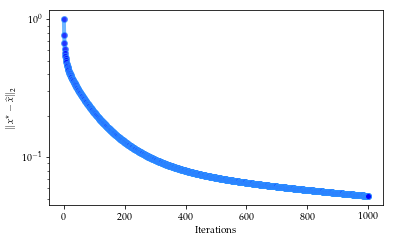

In [50]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

x_IHT, x_list, f_list = GD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

**Problem definition: Sparse linear regression**. 

\begin{align}
  y = A x^\star + w
\end{align}

+ $A \in \mathbb{R}^{n \times p}$, but now $n \ll p$
+ $x^\star \in \mathbb{R}^p$ but $k$-sparse, where $k \ll p$
+ $w \in \mathbb{R}^n$

Assume $n = p$, and $A$ is in general position.
Given $y$ and $A$:

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^p}{\text{min}}
& & f(x) \triangleq \|y - A x\|_2^2 \\
& \text{subject to} 
& & \|x\|_1 \leq \lambda
\end{aligned}
\end{equation*}

+ This is the famous Lasso approach, that was analyzed and popularized by R. Tibshirani in 1996.

Tibshirani, Robert. "Regression shrinkage and selection via the lasso." Journal of the Royal Statistical Society. Series B (Methodological) (1996): 267-288. ---> 25K citations!

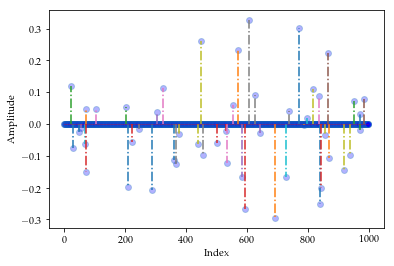

In [107]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la

p = 1000  # Ambient dimension
n = 400   # Number of samples
k = 50    # Sparsity level

# Generate a p-dimensional zero vector
x_star = np.zeros(p)
# Randomly sample k indices in the range [1:p]
x_star_ind = random.sample(range(p),  k) 
# Set x_star_ind with k random elements from Gaussian distribution
x_star[x_star_ind] = np.random.randn(k)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_star, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

### Hyper-parameter tuning

+ Key component in Lasso is the proper guess/tuning of the hyper-parameter $\lambda$.
+ Let's see how it works in practice

In [108]:
import math

# Generate sensing matrix
A = (1 / math.sqrt(n)) * np.random.randn(n, p)

# Observation model
y = A @ x_star

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

[0.14996337]


### Projection onto the $\ell_1$ norm ball

+ We first need to figure out how the projection onto the $\ell_1$-norm ball can be efficiently completed. Is it possible? Or should we depend on approximation schemes?

+ It turns out that the projection onto the $\ell_1$ norm ball is efficiently and accurately computed as:

1. Sort input vector $x$ into $\mu$: $\mu_1 \geq \mu_2 \geq \cdots \geq \mu_p$.

2. Find $\rho = \max \left\{ j \in [p]~:~ \mu_j - \tfrac{1}{j} \left( \sum_{r = 1}^j \mu_r - \lambda \right) > 0 \right\}$

3. Define $\theta = \tfrac{1}{\rho} \left( \sum_{i=1}^\rho \mu_i - \lambda\right)$

4. Output $w$ such that $w_i = \max\{ x_i - \theta, 0 \}$



In [109]:
from numpy import linalg as la

# Projection onto l1 norm ball
def l1normProj(x, l):
    assert l > 0, "Radius lambda must be strictly positive (%d <= 0)" % l
    n, = x.shape  
    
    u = np.abs(x)                               # compute the vector of absolute values
    
    if u.sum() <= l:                            # check if v is already a solution    
        return x
    
    u = np.sort(x)[::-1]                        # get the array of cumulative sums of a sorted (decreasing) copy of v
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - l))[0][-1]   # get the number of > 0 components of the optimal solution
    theta = (float(cssv[rho] - l) / rho).clip(min=0)                 # compute the projection by thresholding v using theta          # compute the Lagrange multiplier associated to the simplex constraint
    w = (np.abs(x) - theta).clip(min=0)                 # compute the projection by thresholding v using theta
    w *= np.sign(x)    
        
    return w

# Returns the value of the objecive function
def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [110]:
def Lasso(y, A, l, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_temp = x_old - eta * grad    
    
        # Perform hard thresholding step
        x_new = l1normProj(x_temp, l)
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list
    

iter# = 0, ||x_new - x_old||_2 = 0.26645744928154574
iter# = 1, ||x_new - x_old||_2 = 0.09345525433033143
iter# = 2, ||x_new - x_old||_2 = 0.06864225371083175
iter# = 3, ||x_new - x_old||_2 = 0.05522248539005701
iter# = 4, ||x_new - x_old||_2 = 0.046358531200705315
iter# = 5, ||x_new - x_old||_2 = 0.03984504157911781
iter# = 6, ||x_new - x_old||_2 = 0.03470031661224958
iter# = 7, ||x_new - x_old||_2 = 0.03087334014297628
iter# = 8, ||x_new - x_old||_2 = 0.027856439247195885
iter# = 9, ||x_new - x_old||_2 = 0.025295844382052353
iter# = 10, ||x_new - x_old||_2 = 0.023038519037443233
iter# = 11, ||x_new - x_old||_2 = 0.021152119183824238
iter# = 12, ||x_new - x_old||_2 = 0.019543428360495482
iter# = 13, ||x_new - x_old||_2 = 0.01804435984112253
iter# = 14, ||x_new - x_old||_2 = 0.016748023175991254
iter# = 15, ||x_new - x_old||_2 = 0.01559614763487199
iter# = 16, ||x_new - x_old||_2 = 0.01459986628857717
iter# = 17, ||x_new - x_old||_2 = 0.013769212341102146
iter# = 18, ||x_new - x_old||_

iter# = 396, ||x_new - x_old||_2 = 2.2036929697337606e-05
iter# = 397, ||x_new - x_old||_2 = 2.1809243036094258e-05
iter# = 398, ||x_new - x_old||_2 = 2.1584266145615382e-05
iter# = 399, ||x_new - x_old||_2 = 2.1361932683901483e-05
iter# = 400, ||x_new - x_old||_2 = 2.1142014185769176e-05
iter# = 401, ||x_new - x_old||_2 = 2.0924719748981387e-05
iter# = 402, ||x_new - x_old||_2 = 2.070982690550422e-05
iter# = 403, ||x_new - x_old||_2 = 2.0497339830130294e-05
iter# = 404, ||x_new - x_old||_2 = 2.0287208175047534e-05
iter# = 405, ||x_new - x_old||_2 = 2.007938723393397e-05
iter# = 406, ||x_new - x_old||_2 = 1.9873836356134885e-05
iter# = 407, ||x_new - x_old||_2 = 1.9670518031551923e-05
iter# = 408, ||x_new - x_old||_2 = 1.9469397259221303e-05
iter# = 409, ||x_new - x_old||_2 = 1.9267603249177726e-05
iter# = 410, ||x_new - x_old||_2 = 1.9068933701498057e-05
iter# = 411, ||x_new - x_old||_2 = 1.887274022214233e-05
iter# = 412, ||x_new - x_old||_2 = 1.8679094543721988e-05
iter# = 413, ||x_

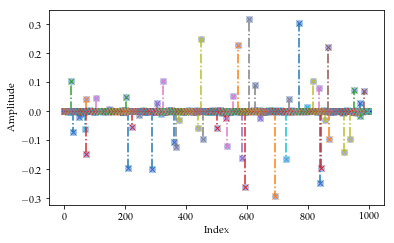

2.5


In [128]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

l = la.norm(x_star, 1)
l = 2.5

x_Lasso, x_list, f_list = Lasso(y, A, l, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_Lasso, '-.x')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
#plt.title(r"$\|x^\star - \widehat{x}\|_2 = %s$" %(la.norm(x_star - x_IHT, 2)), fontsize=16)

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()
print(l)

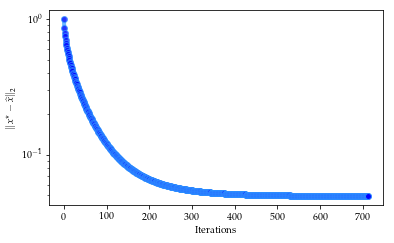

In [129]:
# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()